## **Evaluate classification results produced from model**

This script is used for the following:

1. to extract evaluation output data from training, validating 
2. to evaluate the model on the test set of data
3. to extract evaluation out data for the test set
4. to produce a confusion matrix
5. to identify false negatives and false positives

In [1]:
# model path and filenames
model_name = 'VGG16'
model_score = 'VGG16_score.pkl'
history_file = 'VGG16_history.pkl'
model_file = 'VGG16_model.hdf5'

In [6]:
# choose day or night output
#model_path = '/home/ubuntu/michael/model_output/VGG16/'
#model_path = '/home/ubuntu/michael/model_output/VGG16/day/'
model_path = '/home/ubuntu/michael/model_output/VGG16/night/'

## **Access data saved during testing**

In [7]:
import pandas as pd

In [8]:
# open pickle file with score object (validation loss and accuracy during training)
score = pd.read_pickle(model_path + model_score)
score[0] = score[0], 4
score[1] = score[1], 4
print(f'Validation Accuracy: {score[1]}, Validation Loss: {score[0]} for {model_name} model')

Validation Accuracy: (0.8659793734550476, 4), Validation Loss: (0.3412906527519226, 4) for VGG16 model


In [9]:
# create dataframe from pickle file of history object containig accuracy and loss values during trainingand create dataframe
history = pd.read_pickle(model_path + history_file)
history

,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,0.528721,0.753224,0.462762,0.810997
1,0.448015,0.807825,0.420778,0.824742
2,0.404287,0.834910,0.457309,0.786942
3,0.395193,0.834910,0.389147,0.848797
4,0.385717,0.846948,0.372775,0.855670
...,...,...,...,...
80,0.319964,0.880482,0.314261,0.869416
81,0.314261,0.879192,0.310991,0.876289
82,0.317024,0.877042,0.308021,0.869416
83,0.309956,0.879192,0.314287,0.879725


In [10]:
history_dict = history
history_dict.keys()
#val_loss_values = history_dict['Validation Loss']
#val_loss_values

#history_dict
print (history_dict.loc[history_dict['Validation Loss'] == 0.2906920909881592])

Empty DataFrame
Columns: [Training Loss, Training Accuracy, Validation Loss, Validation Accuracy]
Index: []


## **Visualize accuracy and loss during training**

In [11]:
import matplotlib.pyplot as plt
import sys

In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history['Training Loss'], color='blue', label='train')
    plt.plot(history['Validation Loss'], color='orange', label='validation')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history['Training Accuracy'], color='blue', label='train')
    plt.plot(history['Validation Accuracy'], color='orange', label='validation')
    plt.legend(loc = 'lower right')    
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    plt.savefig(model_path + 'VGG16_loss_acc.jpg')

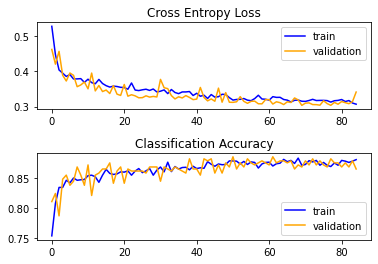

In [13]:
summarize_diagnostics(history)

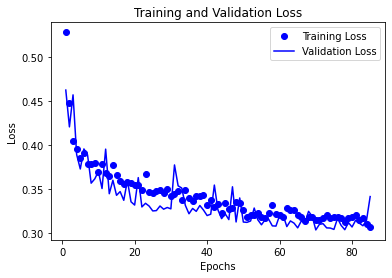

In [14]:
# plot training and validation loss
history_dict = history
history_dict.keys()
loss_values = history_dict['Training Loss']
val_loss_values = history_dict['Validation Loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(model_path + 'VGG16_loss.jpg')

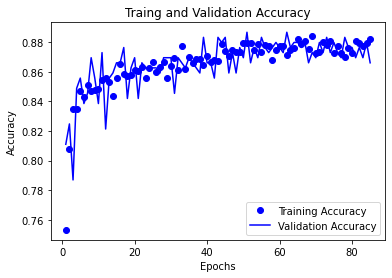

In [15]:
# plot training and validation accuracy
plt.clf() # clear figure
acc = history_dict['Training Accuracy']
val_acc = history_dict['Validation Accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Traing and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.savefig(model_path + 'VGG16_acc.jpg')

## **Load test dataset**

In [16]:
# ORIGINAL TEST SETS (BALANCED)

# choose day or nighttest image directory
#test_dir = '/home/ubuntu/michael/day/test' # day images only
test_dir = '/home/ubuntu/michael/night/test' # night images only

In [ ]:
# NEW TEST SETS (UNBALANCED)
# choose day or nighttest image directory
#test_dir = '/home/ubuntu/michael/unbalanced_day_test' # day images only
#test_dir = '/home/ubuntu/michael/unbalanced_night_test' # night images only

In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_size = (224, 224)
img_shape = (224, 224, 3)

In [19]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0) #scale 

In [20]:
test_it = test_datagen.flow_from_directory(directory = test_dir, classes = ['nofog', 'fog'], class_mode = 'binary', # validation_iterator
                    batch_size = 16, target_size = img_size)

Found 291 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in test_it:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break

data batch shape: (16, 224, 224, 3)
labels batch shape: (16,)


In [22]:
test_it.class_indices

{'nofog': 0, 'fog': 1}

In [23]:
test_it.labels # displays an array of 0s and 1s for the assigned label for each image

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

## **Load model used**

In [24]:
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.xception import preprocess_input

In [25]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', # weights specifies the weight checkpoint from which to initialize model
                 include_top=False, # refers to including or not including the densely connected classifier on top of the networks (By default it contains 1000 classes but we only need 2!)
                 input_shape= img_shape) # shape of image tensors fed to network (optional). If not passed, network can process inputs of any size.
conv_base.trainable = False

In [26]:
# load baseline model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation = 'sigmoid', name = 'output'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [28]:
# compile model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=1e-5), metrics = ['acc'])

## **Evaluate model after adding learned weights**

In [29]:
import h5py    
import numpy as np 

In [30]:
# load weights from checkpoint
model.load_weights(model_path + model_file)

In [31]:
with h5py.File(model_path + model_file, 'r') as f:
    # list all groups
    print('Keys: %s' % f.keys())
    a_group_key = list(f.keys())[0]
    
    # get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [32]:
# evaluate model with weights added
score = model.evaluate(test_it, steps=len(test_it), verbose = 2)
loss = round(score[0], 4)
accuracy = round(score[1], 4)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 - 18s - loss: 0.2536 - acc: 0.9003
Loss: 0.2536, Accuracy: 0.9003


In [33]:
# save model test score
import pickle
with open(model_path + 'VGG16_score.pkl', 'wb') as f:pickle.dump(score, f)

## **Access test dataframe for importing images**

In [34]:
src_dir = '/home/ubuntu/michael/my_pickles/'

In [35]:
# THESE ARE THE BALANCED TEST SET DATAFRAMES

# choose day or night sample test dataframe
#infile = 'day_test_df.pkl' # day only dataframe'
infile = 'night_test_df.pkl'

In [36]:
# THESE ARE THE UNBALANCED TEST SET DATAFRAMES

# choose day or night sample test dataframe
#infile = 'new_day_test_sample_ub.pkl' # day only dataframe'
infile = 'new_night_test_sample_ub.pkl'

In [37]:
# assign saved dataframe to sample dataframe 
test_df = pd.read_pickle(src_dir + infile)
test_df

,filename,label,day_phase,phase,filepath,y_true
0,A27-HM645-ID10971_20190322_0230.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
1,A27-HM657-ID10966_20190425_2200.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
2,A9-HM427-ID12855_20190324_0500.jpg,Fog,20,Night,/home/ubuntu/michael/nl_images/images_data/A9-...,1
3,A1-HM61-ID12961_20190429_2141.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A1-...,1
4,A27-HM645-ID10971_20190322_0150.jpg,Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A27...,1
...,...,...,...,...,...,...
3148,A50-HM1835-ID11509_20170905_2340.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
3149,A5-HM126-ID13778_20181009_1921.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A5-...,0
3150,A50-HM1927-ID11542_20191230_1651.jpg,No Fog,21,Night,/home/ubuntu/michael/nl_images/images_data/A50...,0
3151,A5-HM116-ID13776_20170916_0031.jpg,No Fog,0,Night,/home/ubuntu/michael/nl_images/images_data/A5-...,0


In [38]:
# create a list of the ground-truth labels
labels = test_df.y_true.tolist()
len(labels)

3153

In [39]:
# visualize classes count
test_df.groupby('label').count()

,filename,day_phase,phase,filepath,y_true
label,,,,,
Fog,153,153,153,153,153
No Fog,3000,3000,3000,3000,3000


In [40]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [41]:
# image source location
src = '/home/ubuntu/backup_images_2/images01062021'

In [42]:
import os
image_list = []
for filepath in test_df.filepath.values:
    fn = os.path.basename(filepath)
    fp = os.path.join(src, fn)
    img = load_img(fp, target_size = img_size)
    img = img_to_array(img)
    img = img / 255.
    image_list.append(img)
images = np.asarray(image_list)
images.shape

(3153, 224, 224, 3)

## **Make probability predictions for test set**

In [43]:
# use model to make predictions on test set
probabilities = model.predict(images)
len(probabilities)

3153

In [44]:
# force probabilities greater than 0.5 to be 1 and equal to or less than 0.5 to be 0
y_pred = (probabilities > 0.5).astype('int32')
len(y_pred)

3153

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [46]:
y_test = test_df['y_true']
len(y_test)

3153

In [47]:
y_true = test_df['y_true']
#y_pred = y_pred.tolist()

In [48]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
print(thresholds)

[0 1]


In [49]:
precision

array([0.04852521, 0.25547445, 1.        ])

In [50]:
recall

array([1.        , 0.91503268, 0.        ])

In [51]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
auc_score

0.587315094849476

In [52]:
prerec_df = pd.DataFrame()
prerec_df['Precision'] = precision
prerec_df['Recall'] = recall
prerec_df

,Precision,Recall
0,0.048525,1.000000
1,0.255474,0.915033
2,1.000000,0.000000


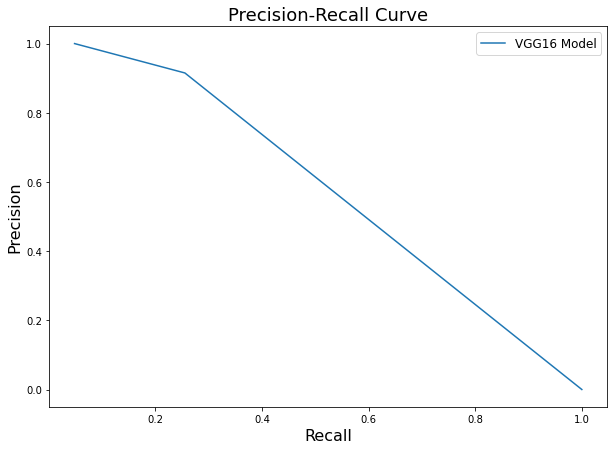

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(precision, recall, label = 'VGG16 Model')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.ylabel('Precision', fontsize = 16)
plt.xlabel('Recall', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper right')
plt.savefig(model_path + 'VGG16_prerec.jpg')

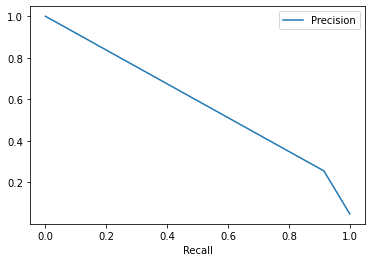

In [54]:
prerec_df.plot('Recall', 'Precision')
plt.show()

In [55]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true, y_pred)
average_precision

0.23789053033155547

## **Create dataframe of probabilities and original labels**

In [56]:
# create a list of test image probabilities
t_img_prob = []
for index, probability in enumerate(probabilities):
    prob = probabilities[index][0]
    t_img_prob.append(prob)

In [57]:
# create lists of test image filepaths
t_img_fps = [] # test image filepaths
for i, image in enumerate(test_df.filepath.values):
    t_img_fps.append(image)
    
# store filepaths in dataframe
t_img_df = pd.DataFrame()
t_img_df['Filepath'] = t_img_fps
t_img_df['Label'] = labels
t_img_df['Probability'] = t_img_prob
t_img_df.head()

,Filepath,Label,Probability
0,/home/ubuntu/michael/nl_images/images_data/A27...,1,0.958685
1,/home/ubuntu/michael/nl_images/images_data/A27...,1,0.151198
2,/home/ubuntu/michael/nl_images/images_data/A9-...,1,0.624263
3,/home/ubuntu/michael/nl_images/images_data/A1-...,1,0.385623
4,/home/ubuntu/michael/nl_images/images_data/A27...,1,0.960327


## **Identify and visualize test images with High probability of being fog**

In [58]:
# subset dataframe for test images with high probability of being fog
t_img_hprob_df = t_img_df[t_img_df.Probability >= 0.75]

# extract a random sample of 12 images for visualization
hprob_sample_df = t_img_hprob_df.sample(n = 12, replace = False, axis=None)

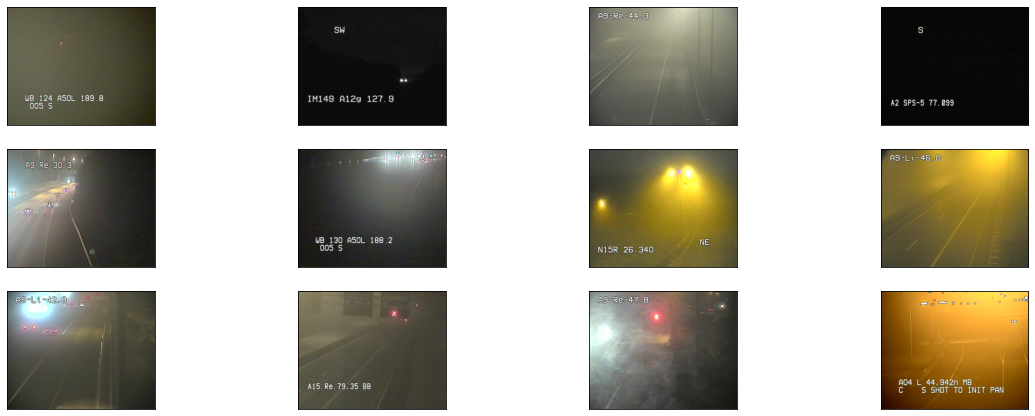

In [59]:
# visualize images identified as high probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(hprob_sample_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    ax = axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(model_path + 'VGG16_Hprob.jpg')

## **Identify and visualize test images with Low probability of being fog**

In [60]:
# subset dataframe for test images with low probability of being fog
t_img_lprob_df = t_img_df[t_img_df.Probability <= 0.25]

# extract a random sample of 12 images for visualization
lprob_sample_df = t_img_lprob_df.sample(n = 12, replace = False, axis=None)

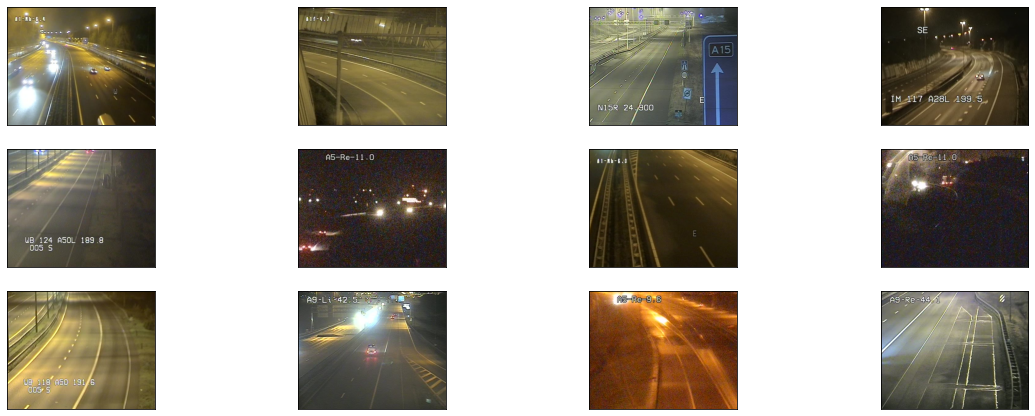

In [61]:
# visualize images identified as low probabiity of being fog
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(lprob_sample_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(model_path + 'VGG16_Lprob.jpg')

## **Identify and visualize test images with that are borderline cases fog**

In [62]:
# subset dataframe for test images that are borderline
t_img_bprob_df = t_img_df[(t_img_df.Probability > 0.49) & (t_img_df.Probability < 0.51)]
len(t_img_bprob_df)

24

ValueError: num must be 1 <= num <= 16, not 17

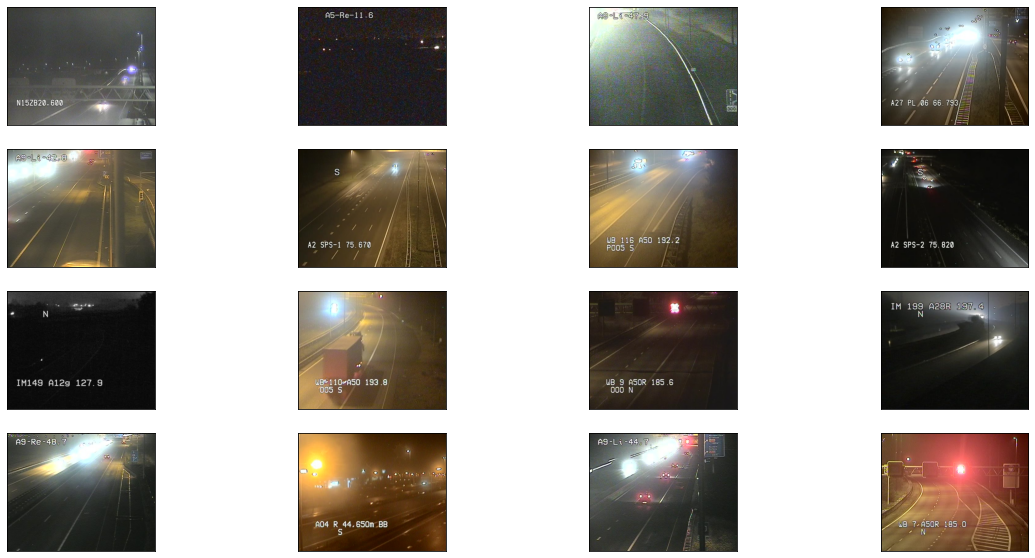

In [63]:
# visualize images identified as being borderline cases
rows = 4
cols = 4
axes =[]
fig = plt.figure(figsize = (20, 10))
for i, path in enumerate(t_img_bprob_df.Filepath):
    fn = os.path.basename(path)
    fp = os.path.join(src, fn)
    img = plt.imread(fp)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(model_path + 'VGG16_border.jpg')

## **Build confusion matrix and visualize metrics**

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [65]:
# force all values greater than 0.5 to be 1 for fog since it is class A
y_pred = (probabilities > 0.5).astype('int32')

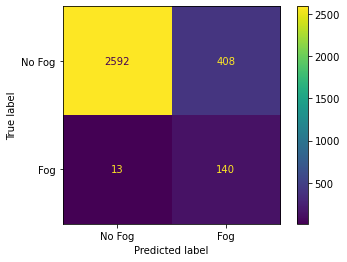

In [66]:
import pickle
labels = ['No Fog', 'Fog']
y_true = test_df.y_true.to_list()
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.savefig(model_path + 'VGG16_cm.jpg')

In [67]:
from sklearn.metrics import classification_report

cr = classification_report(y_true, y_pred, target_names=labels)

print(cr)
out_dir = '/home/ubuntu/michael/script_images/'
# save classification rerport
with open(model_path + 'VGG16_cr.pkl', 'wb') as f:pickle.dump(cr, f)

              precision    recall  f1-score   support

      No Fog       1.00      0.86      0.92      3000
         Fog       0.26      0.92      0.40       153

    accuracy                           0.87      3153
   macro avg       0.63      0.89      0.66      3153
weighted avg       0.96      0.87      0.90      3153



## **Create ROC graph and display AUC**

In [68]:
probs = np.array(probabilities)
probs.shape # (291, )
probs = probs.tolist()

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, y_pred)
auc = auc(fpr, tpr)
with open(model_path + 'VGG16_auc.pkl', 'wb') as f:pickle.dump(auc, f)
auc

0.8895163398692809

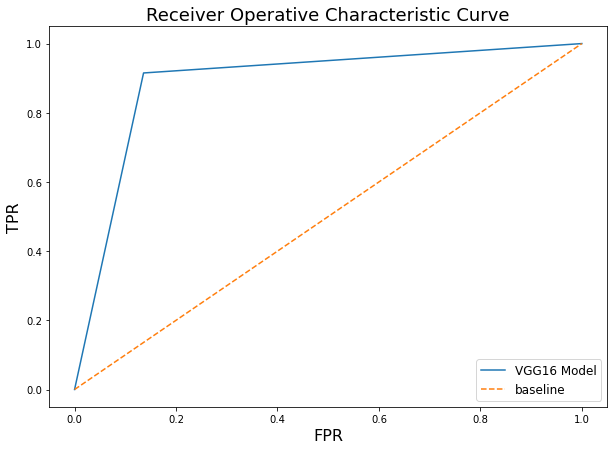

In [70]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fpr, tpr, label = 'VGG16 Model')
ax.plot(np.linspace(0, 1, 100),
        np.linspace(0, 1, 100),
        label = 'baseline',
        linestyle = '--')
plt.title('Receiver Operative Characteristic Curve', fontsize = 18)
plt.ylabel('TPR', fontsize = 16)
plt.xlabel('FPR', fontsize = 16)
plt.legend(fontsize = 12, loc = 'lower right')
plt.savefig(model_path + 'VGG16_roc.jpg')

## **Identify and visualize false positives**

In [71]:
# image source location
src = '/home/ubuntu/backup_images_2/images01062021'

In [72]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fp = test_df[(test_df.y_true == 0) & (test_df.y_pred == 1)]
len(fp)

408

In [73]:
# get the list of false positive filenames
fp_filenames = fp.filename.values
len(fp_filenames)

408

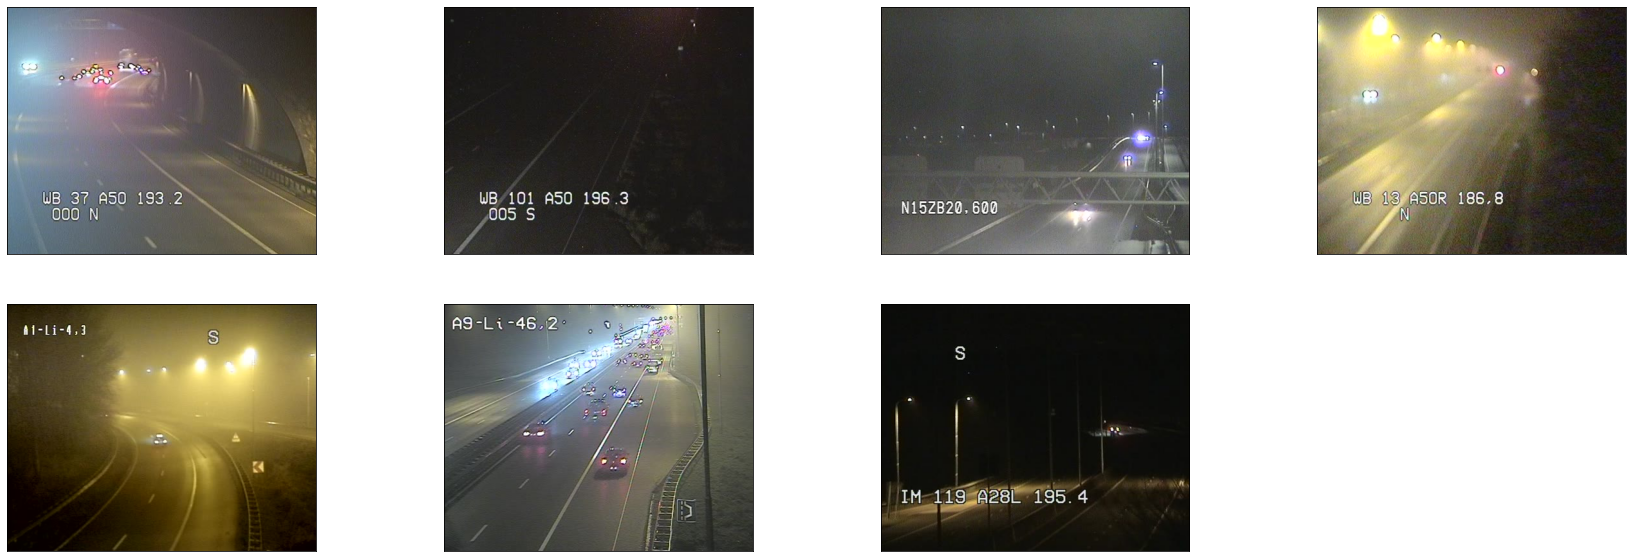

In [74]:
# visualize the false positives
rows = 2
cols = 4
axes =[]

fig = plt.figure(figsize = (30, 10))

for i in range((rows*cols)-1):
    path = os.path.join(src + '/' + fp_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(model_path + 'VGG16_fp.jpg')

## **Identify and visualize false negatives**

In [75]:
# assignment of actual and prediction values
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred

# find images in test dataframe that are false positive
fn = test_df[(test_df.y_true == 1) & (test_df.y_pred == 0)]
len(fn)

13

In [76]:
# get the list of false negative filenames
fn_filenames = fn.filename.values
len(fn_filenames)

13

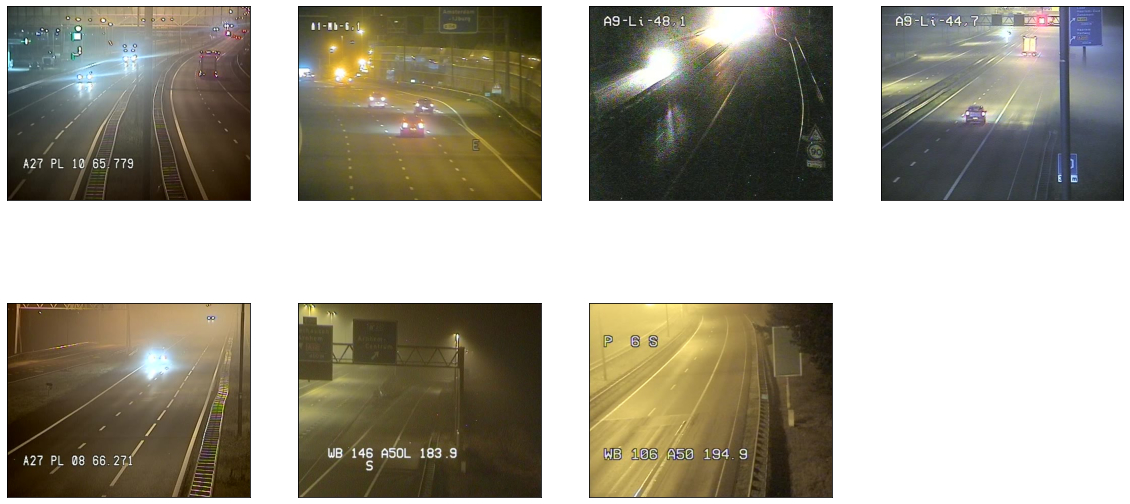

In [77]:
# visualize the false negative images
rows = 2
cols = 4
axes =[]

fig = plt.figure(figsize = (20, 10))

for i in range((rows*cols)-1):
    path = os.path.join(src + '/' + fn_filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i + 1)) # add 1 b/c 
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(img)
plt.savefig(model_path + 'VGG16_fn.jpg')